<a id=top-page></a>

<h1>
<center>
→ Quantitative assessment of the optimized PVs
</center>
</h1>

<h3>
<center>
📄 Optimizing progress variables for ammonia/hydrogen combustion using encoding-decoding networks
</center>
</h3>

<center>
K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2025)
</center>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#cost-function-hp">Specify the cost function's hyper-parameters</a></li>
    <li><a href="#YNO">Parameterization with PV = $Y_{NO}$</a></li>
    <li><a href="#YH2O">Parameterization with PV = $Y_{H_2O}$ - $Y_{NO}$ - $Y_{NO_2}$</a></li>
    <li><a href="#PCA-based-PV">Parameterization with the PCA-based PV</a></li>
    <li><a href="#optimized-PV">Parameterization with the optimized PV</a></li>
    <li><a href="#f-PV-manifolds">Visualize the $(f, \text{PV})$ manifolds</a></li>
    <li><a href="#PVs-in-f-chi-space">Visualize the representation of PVs and the PV source terms over the $(f, \chi_{\text{st}})$ space</a></li>
    <li><a href="#Li">Visualize the individual costs, $\mathcal{L}_i$</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.2
pandas==2.1.3
scipy==1.11.4
scikit-learn==1.3.2
PCAfold==2.2.0


In [2]:
data_type = 'SLF'
data_tag = 'NH3-H2-air-25perc'
target_variables_indices = [0,1,3,5,6,9]
pure_streams = True

%run -i ../scripts/ammonia-Stagni-load-data.py


Using: T, H2, O2, H2O, OH, NO as target state variables at the decoder output.

24150 observations
29 state variables


<a id=cost-function-hp></a>
***

## Specify the cost function's hyper-parameters

[**Go to the top ↑**](#top-page)

In [3]:
power = 4
vertical_shift = 1
penalty_function = 'log-sigma-over-peak'

<a id=YNO></a>
***

## Parameterization with PV = $Y_{NO}$

[**Go to the top ↑**](#top-page)

In [4]:
VarianceData_YNO = pickle.load(open('../results-PCA-based-PVs/f-PV-YNO-parameterization-VarianceData-NH3-H2-air-25perc.pkl', 'rb'))

In [5]:
sigmas_YNO = VarianceData_YNO.bandwidth_values
D_hat_YNO = analysis.normalized_variance_derivative(VarianceData_YNO)

In [6]:
costs_YNO = analysis.cost_function_normalized_variance_derivative(VarianceData_YNO,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)

L2_norm_cost_YNO = np.linalg.norm(costs_YNO)/len(costs_YNO)
L2_norm_cost_YNO

1.267143301704605

<a id=YH2O></a>

***

## Parameterization with PV = $Y_{H_2O}$ - $Y_{NO}$ - $Y_{NO_2}$

[**Go to the top ↑**](#top-page)

In [7]:
PV_literature = state_space[:,5] - state_space[:,9] - state_space[:,11]
PV_literature_source = state_space_sources[:,5] - state_space_sources[:,9] - state_space_sources[:,11]

In [8]:
VarianceData_YNO_YNO2_YH2O = pickle.load(open('../results-PCA-based-PVs/f-PV-YNO-YNO2-YH2O-parameterization-VarianceData-NH3-H2-air-25perc.pkl', 'rb'))

In [9]:
sigmas_YNO_YNO2_YH2O = VarianceData_YNO_YNO2_YH2O.bandwidth_values
D_hat_YNO_YNO2_YH2O = analysis.normalized_variance_derivative(VarianceData_YNO_YNO2_YH2O)

In [10]:
costs_YNO_YNO2_YH2O = analysis.cost_function_normalized_variance_derivative(VarianceData_YNO_YNO2_YH2O,
                                                                            penalty_function=penalty_function,
                                                                            norm=None,
                                                                            power=power,
                                                                            vertical_shift=vertical_shift,
                                                                            integrate_to_peak=False)

L2_norm_cost_YNO_YNO2_YH2O = np.linalg.norm(costs_YNO_YNO2_YH2O)/len(costs_YNO_YNO2_YH2O)
L2_norm_cost_YNO_YNO2_YH2O

1.3842903575856946

<a id=PCA-based-PV></a>

***

## Parameterization with the PCA-based PV

[**Go to the top ↑**](#top-page)

In [11]:
scalings_list = ['None', 'Auto', 'Pareto', 'VAST', 'Range', '0to1', '-1to1', 'Level', 'Max', 'Poisson']

In [12]:
costs_collected = np.zeros((len(scalings_list),2))

for j, scaling in enumerate(scalings_list):

    print(scaling)

    for i in range(0,2):

        print('PC' + str(i+1))

        VarianceData_PCA = pickle.load(open('../results-PCA-based-PVs/PCA-based-PV-tps-scaling-' + scaling + '-PC' + str(i+1) + '-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source.pkl', 'rb'))

        costs_PCA = analysis.cost_function_normalized_variance_derivative(VarianceData_PCA,
                                                                      penalty_function=penalty_function,
                                                                      norm=None,
                                                                      power=power,
                                                                      vertical_shift=vertical_shift,
                                                                      integrate_to_peak=False)

        L2_norm_cost_PCA = np.linalg.norm(costs_PCA)/len(costs_PCA)
        print(L2_norm_cost_PCA)

        costs_collected[j,i] = L2_norm_cost_PCA

    print('- '* 20 + '\n')

None
PC1
13.81384602267071
PC2
15.554726146489616
- - - - - - - - - - - - - - - - - - - - 

Auto
PC1
2.639358368261206
PC2
0.41129536263788224
- - - - - - - - - - - - - - - - - - - - 

Pareto
PC1
16.160933943271864
PC2
7.6152379925151905
- - - - - - - - - - - - - - - - - - - - 

VAST
PC1
5.566389608311872
PC2
0.3826354094370892
- - - - - - - - - - - - - - - - - - - - 

Range
PC1
2.7885371538635386
PC2
0.3949492884232494
- - - - - - - - - - - - - - - - - - - - 

0to1
PC1
0.666385238581958
PC2
1.5674398307339799
- - - - - - - - - - - - - - - - - - - - 

-1to1
PC1
0.6387607148129519
PC2
2.42070011646818
- - - - - - - - - - - - - - - - - - - - 

Level
PC1
2.4357782513659494
PC2
0.3634473100633956
- - - - - - - - - - - - - - - - - - - - 

Max
PC1
2.788537068280232
PC2
0.39494928601334156
- - - - - - - - - - - - - - - - - - - - 

Poisson
PC1
16.151670427294196
PC2
7.713195065812209
- - - - - - - - - - - - - - - - - - - - 



In [13]:
(idx_best_PCA_scaling, idx_best_PC) = np.where(costs_collected==np.min(costs_collected))

idx_best_PCA_scaling = idx_best_PCA_scaling[0]
idx_best_PC = idx_best_PC[0]

In [14]:
scaling = scalings_list[idx_best_PCA_scaling]
PC_index = idx_best_PC

In [15]:
scaling

'Level'

In [16]:
PC_index

1

In [17]:
VarianceData_PCA = pickle.load(open('../results-PCA-based-PVs/PCA-based-PV-tps-scaling-' + scaling + '-PC' + str(PC_index+1) + '-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source.pkl', 'rb'))

In [18]:
pca = reduction.PCA(state_space[: ,1::], n_components=2, scaling=scaling)
PVs = pca.transform(state_space[: ,1::])
PV_sources = pca.transform(state_space_sources[: ,1::], nocenter=True)

PV_PCA = PVs[:,PC_index]
PV_source_PCA = PV_sources[:,PC_index]

In [19]:
sigmas_PCA = VarianceData_PCA.bandwidth_values
D_hat_PCA = analysis.normalized_variance_derivative(VarianceData_PCA)

In [20]:
costs_PCA = analysis.cost_function_normalized_variance_derivative(VarianceData_PCA,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)

L2_norm_cost_PCA = np.linalg.norm(costs_PCA)/len(costs_PCA)
print(L2_norm_cost_PCA)

0.3634473100633956


<a id=optimized-PV></a>

***

## Parameterization with the optimized PV

[**Go to the top ↑**](#top-page)

In [21]:
random_seeds_list = [i for i in range(0,20)]

In [22]:
costs_L2_RN = []

for random_seed in random_seeds_list:
    variance_data = pickle.load(open('../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(random_seed) + '.pkl', 'rb'))
    costs = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)
     
    costs_L2_RN.append(np.linalg.norm(costs)/len(costs))

In [23]:
idx_optimized_basis, = np.where(costs_L2_RN==np.min(costs_L2_RN))
idx_optimized_basis

array([10])

In [24]:
model_weights_filename = '../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_optimized_basis[0]) + '.h5'

In [25]:
hf = h5py.File(model_weights_filename, 'r')
optimized_basis = np.array(hf.get('0'))
hf.close()

In [26]:
PV_optimized = np.dot(state_space[:,1::], optimized_basis)
PV_optimized_source = np.dot(state_space_sources[:,1::], optimized_basis)

In [27]:
VarianceData_optimized = pickle.load(open('../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(idx_optimized_basis[0]) + '.pkl', 'rb'))

In [28]:
sigmas_optimized = VarianceData_optimized.bandwidth_values
D_hat_optimized = analysis.normalized_variance_derivative(VarianceData_optimized)

In [29]:
costs_optimized = analysis.cost_function_normalized_variance_derivative(VarianceData_optimized,
                                                              penalty_function=penalty_function,
                                                              norm=None,
                                                              power=power,
                                                              vertical_shift=vertical_shift,
                                                              integrate_to_peak=False)

L2_norm_cost_optimized = np.linalg.norm(costs_optimized)/len(costs_optimized)
L2_norm_cost_optimized

0.37640366657535396

<a id=f-PV-manifolds></a>
***

## Visualize the $(f, \text{PV})$ manifolds

[**Go to the top ↑**](#top-page)

/var/folders/25/33sbb31s5flf87qk45kgwk9r0000gn/T/ipykernel_5579/1895108298.py:85: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  figure_a.annotate('Non-uniqueness', xy=(0.000002, 0.3), c='#005b96', fontsize=20, xycoords=arr, textcoords='data')


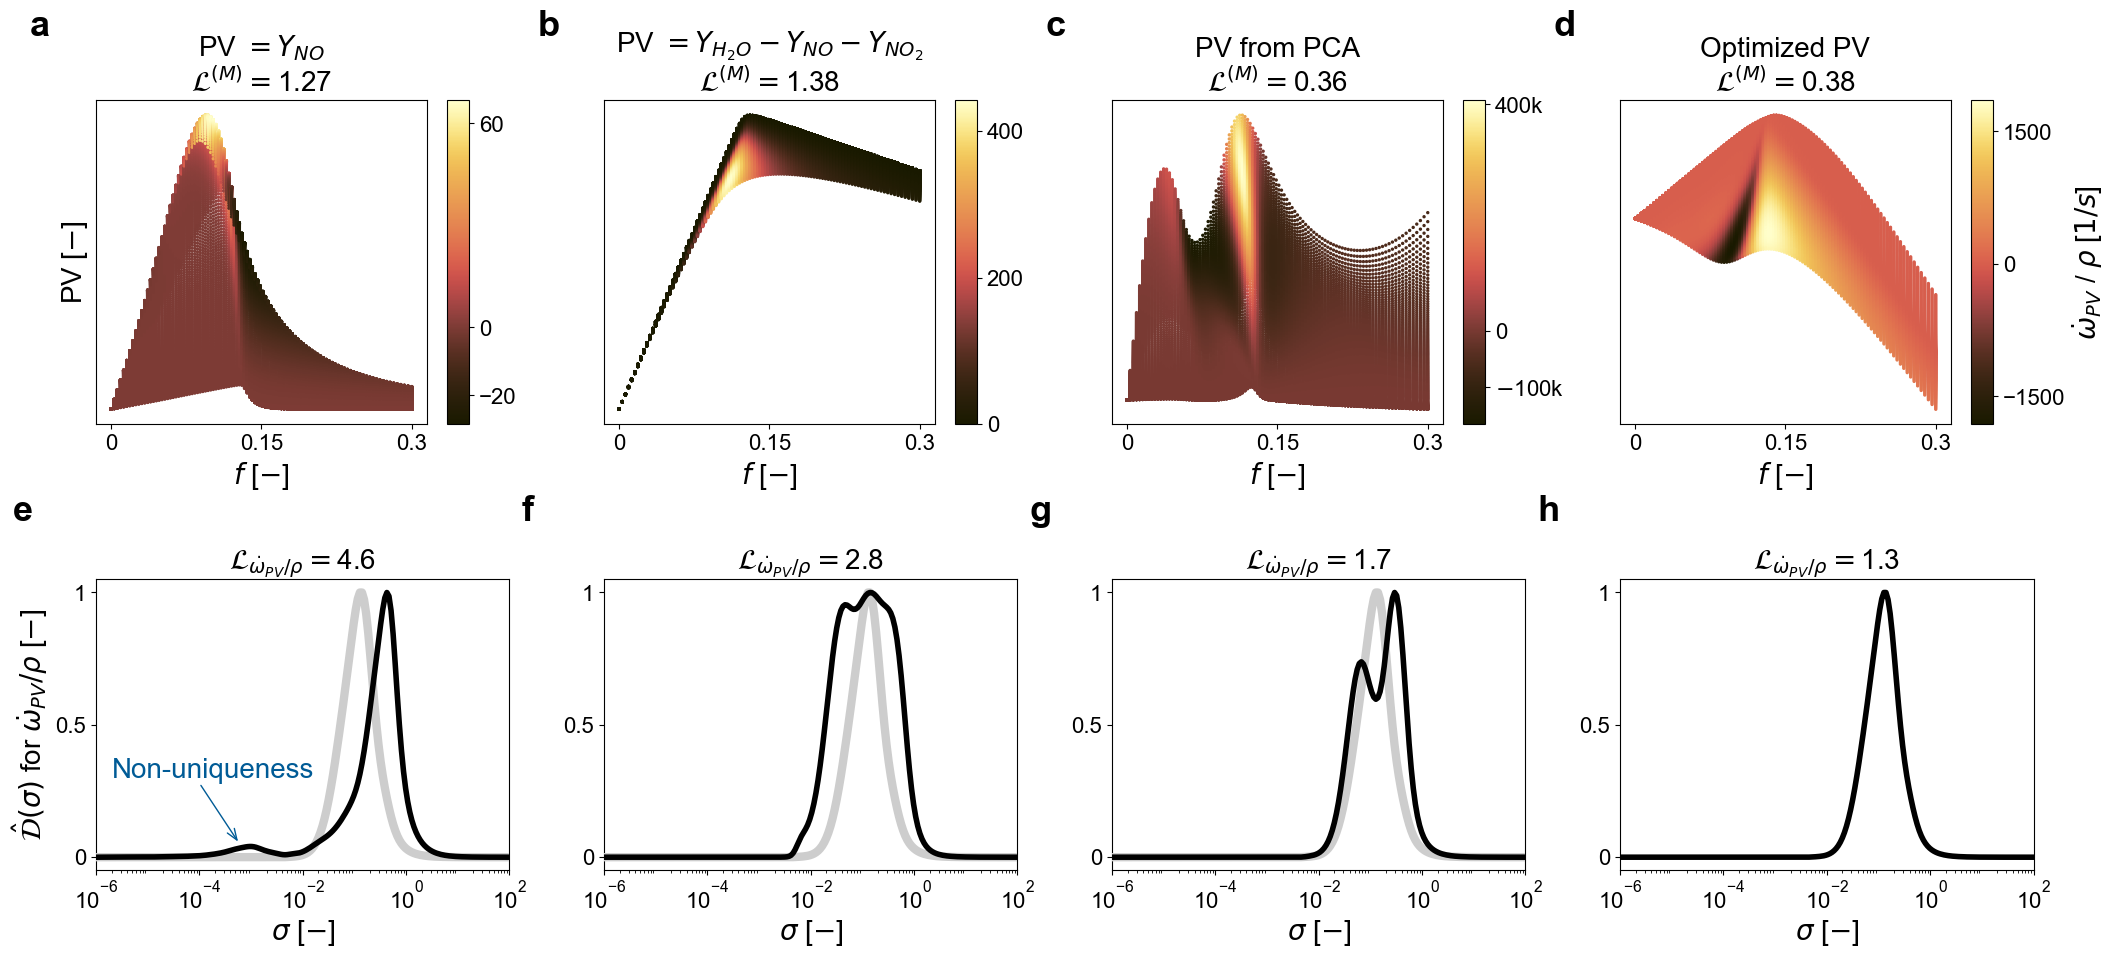

In [30]:
figure = plt.figure(figsize=(25, 10))
spec = figure.add_gridspec(ncols=7, nrows=3, width_ratios=[1,0,1,0,1,0,1], height_ratios=[1,0.2,0.9])

cmap = cmc.lajolla

fontsize = 20
fontsize_axes = 16
fontsize_subfigures = 26
s = 2

x_pos = -0.2
y_pos = 1.2

hfont = {'fontname':'Arial', 'fontweight':'bold'}

# Manifolds - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

figure_a = figure.add_subplot(spec[0,0])
scat = plt.scatter(mf, state_space[:,9:10], c=state_space_sources[:,9:10], s=s, cmap=cmap, zorder=10)
plt.ylabel('PV [$-$]', fontsize=fontsize, rotation=90)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([])
plt.title('PV $= Y_{NO}$\n' + '$\mathcal{L}^{(M)} = $' + str(round(L2_norm_cost_YNO, 2)), fontsize=fontsize)
cbar = plt.colorbar(scat, aspect=15, ticks=[-20,0,60])
# cbar.set_label('$\dot{\omega}_{PV}$ / $\\rho$ [$1/s$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'a', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_a = figure.add_subplot(spec[0,2])
scat = plt.scatter(mf, PV_literature, c=PV_literature_source, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([])
plt.title('PV $ = Y_{H_2O} - Y_{NO} - Y_{NO_2}$\n' + '$\mathcal{L}^{(M)} = $' + str(round(L2_norm_cost_YNO_YNO2_YH2O, 2)), fontsize=fontsize)
cbar = plt.colorbar(scat, aspect=15, ticks=[0,200,400])
# cbar.set_label('$\dot{\omega}_{PV}$ / $\\rho$ [$1/s$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'b', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_a = figure.add_subplot(spec[0,4])
scat = plt.scatter(mf, -PV_PCA, c=-PV_source_PCA, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([])
plt.title('PV from PCA\n' + '$\mathcal{L}^{(M)} = $' + str(round(L2_norm_cost_PCA, 2)), fontsize=fontsize)
cbar = plt.colorbar(scat, aspect=15, ticks=[-100000, 0, 400000])
cbar.ax.set_yticklabels(['$-$100k', '0', '400k']) 
# cbar.set_label('$\dot{\omega}_{PV}$ / $\\rho$ [$1/s$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'c', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_a = figure.add_subplot(spec[0,6])
scat = plt.scatter(mf, -PV_optimized, c=-PV_optimized_source, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([])
plt.title('Optimized PV\n' + '$\mathcal{L}^{(M)} = $' + str(round(L2_norm_cost_optimized, 2)), fontsize=fontsize)
cbar = plt.colorbar(scat, aspect=15, ticks=[-1500, 0, 1500])
cbar.set_label('$\dot{\omega}_{PV}$ / $\\rho$ [$1/s$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'d', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
# D-hats - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

import matplotlib.patches as mpatches

figure_a = figure.add_subplot(spec[2,0])
plt.semilogx(sigmas_YNO[1:-1], D_hat_YNO[0]['PV-source'], lw=4, c='k', zorder=20)
plt.semilogx(sigmas_optimized[1:-1], D_hat_optimized[0]['PV-source'], lw=6, c='#cdcdcd', zorder=10)
plt.xticks([10**-6, 10**-4, 10**-2, 10**0, 10**2], fontsize=fontsize_axes)
plt.yticks([0,0.5,1], ['0', '0.5', '1'], fontsize=fontsize_axes)
plt.xlim([10**-6, 10**2])
plt.xlabel('$\sigma$ [$-$]', fontsize=fontsize)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$ for $\dot{\omega}_{PV} / \\rho$ [$-$]', fontsize=fontsize)
plt.title('$\mathcal{L}_{\dot{\omega}_{PV} / \\rho} = $' + str(round(costs_YNO[-1], 1)), fontsize=fontsize)
plt.text(x_pos,y_pos,'e', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

arr = mpatches.FancyArrowPatch((0.0001, 0.28), (0.0006, 0.05), arrowstyle='->,head_width=.15', color='#005b96', lw=1, mutation_scale=20)
figure_a.add_patch(arr)
figure_a.annotate('Non-uniqueness', xy=(0.000002, 0.3), c='#005b96', fontsize=20, xycoords=arr, textcoords='data')

figure_a = figure.add_subplot(spec[2,2])
plt.semilogx(sigmas_YNO_YNO2_YH2O[1:-1], D_hat_YNO_YNO2_YH2O[0]['PV-source'], lw=4, c='k', zorder=20)
plt.semilogx(sigmas_optimized[1:-1], D_hat_optimized[0]['PV-source'], lw=6, c='#cdcdcd', zorder=10)
plt.xticks([10**-6, 10**-4, 10**-2, 10**0, 10**2], fontsize=fontsize_axes)
plt.yticks([0,0.5,1], ['0', '0.5', '1'], fontsize=fontsize_axes)
plt.xlim([10**-6, 10**2])
plt.xlabel('$\sigma$ [$-$]', fontsize=fontsize)
plt.title('$\mathcal{L}_{\dot{\omega}_{PV} / \\rho} = $' + str(round(costs_YNO_YNO2_YH2O[-1], 1)), fontsize=fontsize)
plt.text(x_pos,y_pos,'f', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[2,4])
plt.semilogx(sigmas_PCA[1:-1], D_hat_PCA[0]['PV-source'], lw=4, c='k', zorder=20)
plt.semilogx(sigmas_optimized[1:-1], D_hat_optimized[0]['PV-source'], lw=6, c='#cdcdcd', zorder=10,)
plt.xticks([10**-6, 10**-4, 10**-2, 10**0, 10**2], fontsize=fontsize_axes)
plt.yticks([0,0.5,1], ['0', '0.5', '1'], fontsize=fontsize_axes)
plt.xlim([10**-6, 10**2])
plt.xlabel('$\sigma$ [$-$]', fontsize=fontsize)
plt.title('$\mathcal{L}_{\dot{\omega}_{PV} / \\rho} = $' + str(round(costs_PCA[-1], 1)), fontsize=fontsize)
plt.text(x_pos,y_pos,'g', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[2,6])
plt.semilogx(sigmas_optimized[1:-1], D_hat_optimized[0]['PV-source'], lw=4, c='k', zorder=10)
plt.xticks([10**-6, 10**-4, 10**-2, 10**0, 10**2], fontsize=fontsize_axes)
plt.yticks([0,0.5,1], ['0', '0.5', '1'], fontsize=fontsize_axes)
plt.xlim([10**-6, 10**2])
plt.xlabel('$\sigma$ [$-$]', fontsize=fontsize)
plt.title('$\mathcal{L}_{\dot{\omega}_{PV} / \\rho} = $' + str(round(costs_optimized[-1], 1)), fontsize=fontsize)
plt.text(x_pos,y_pos,'h', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

plt.savefig('../paper/tps-parameterizations.png', dpi=500, bbox_inches='tight')

<a id=PVs-in-f-chi-space></a>
***

## Visualize the representation of PVs and the PV source terms over the $(f, \chi_{\text{st}})$ space

[**Go to the top ↑**](#top-page)

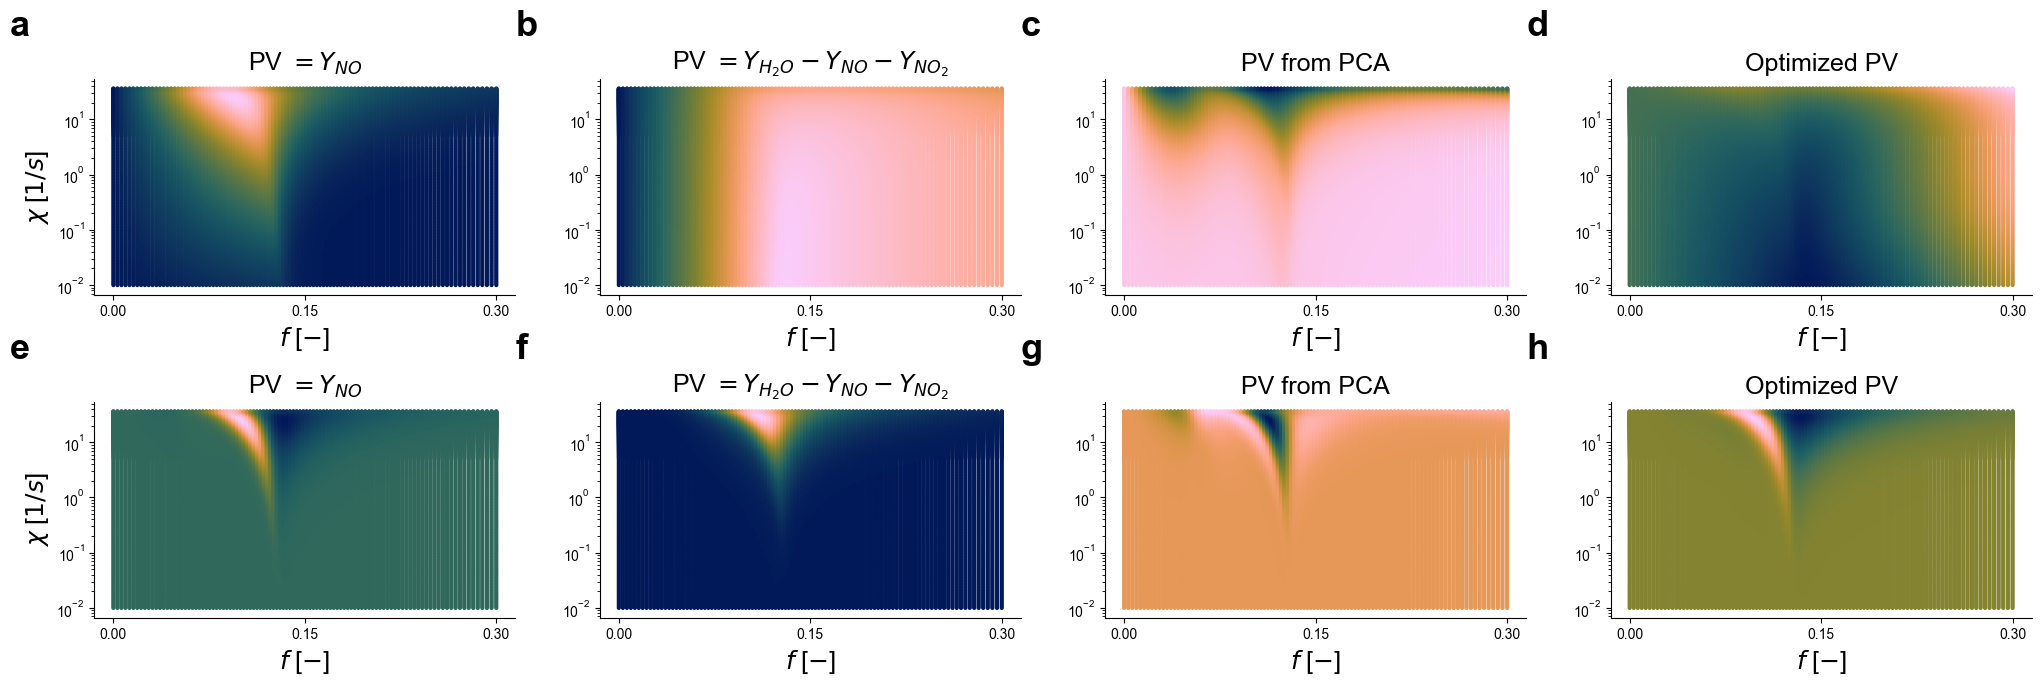

In [31]:
figure = plt.figure(figsize=(25, 7))
spec = figure.add_gridspec(ncols=4, nrows=3, width_ratios=[1,1,1,1], height_ratios=[1,0.2,1])

fontsize = 18
fontsize_subfigures = 26
s = 4

cmap = cmc.batlow

# Manifolds - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

figure_a = figure.add_subplot(spec[0,0])
scat = plt.scatter(mf, chi, c=state_space[:,9:10], s=s, cmap=cmap, zorder=10)
plt.ylabel('$\chi$ [$1/s$]', fontsize=fontsize, rotation=90)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('PV $= Y_{NO}$', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.text(x_pos,y_pos,'a', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[0,1])
scat = plt.scatter(mf, chi, c=PV_literature, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('PV $ = Y_{H_2O} - Y_{NO} - Y_{NO_2}$', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.text(x_pos,y_pos,'b', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[0,2])
scat = plt.scatter(mf, chi, c=PV_PCA, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('PV from PCA', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.text(x_pos,y_pos,'c', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[0,3])
scat = plt.scatter(mf, chi, c=PV_optimized, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('Optimized PV', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# cbar = plt.colorbar(scat, aspect=15)
# cbar.set_label('PV [$-$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'d', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

# PV source terms - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

figure_a = figure.add_subplot(spec[2,0])
scat = plt.scatter(mf, chi, c=state_space_sources[:,9:10], s=s, cmap=cmap, zorder=10)
plt.ylabel('$\chi$ [$1/s$]', fontsize=fontsize, rotation=90)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('PV $= Y_{NO}$', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.text(x_pos,y_pos,'e', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[2,1])
scat = plt.scatter(mf, chi, c=PV_literature_source, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('PV $ = Y_{H_2O} - Y_{NO} - Y_{NO_2}$', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.text(x_pos,y_pos,'f', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[2,2])
scat = plt.scatter(mf, chi, c=PV_source_PCA, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('PV from PCA', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.text(x_pos,y_pos,'g', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

figure_a = figure.add_subplot(spec[2,3])
scat = plt.scatter(mf, chi, c=PV_optimized_source, s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3])
plt.yticks([])
plt.yscale('log')
plt.title('Optimized PV', fontsize=fontsize)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# cbar = plt.colorbar(scat, aspect=15)
# cbar.set_label('$\dot{\omega}_{PV}$ / $\\rho$ [$1/s$]', rotation=90, fontsize=fontsize)
plt.text(x_pos,y_pos,'h', fontsize=fontsize_subfigures, transform=figure_a.transAxes, **hfont)

plt.savefig('../paper/supplementary-figures/tps-PV-over-the-f-chi-space.png', dpi=500, bbox_inches='tight') 

<a id=Li></a>
***

## Visualize the individual costs, $\mathcal{L}_i$

[**Go to the top ↑**](#top-page)

In [32]:
names_neat = ['$T$', '$Y_{H_2}$', '$Y_{H}$', '$Y_{O_2}$', '$Y_{O}$', '$Y_{H_2O}$', '$Y_{OH}$', '$Y_{H_2O_2}$', '$Y_{NO}$', '$Y_{N_2O}$', '$Y_{NO_2}$', '$Y_{NH_2}$', '$\\frac{\dot{\omega}_{PV}}{\\rho}$']

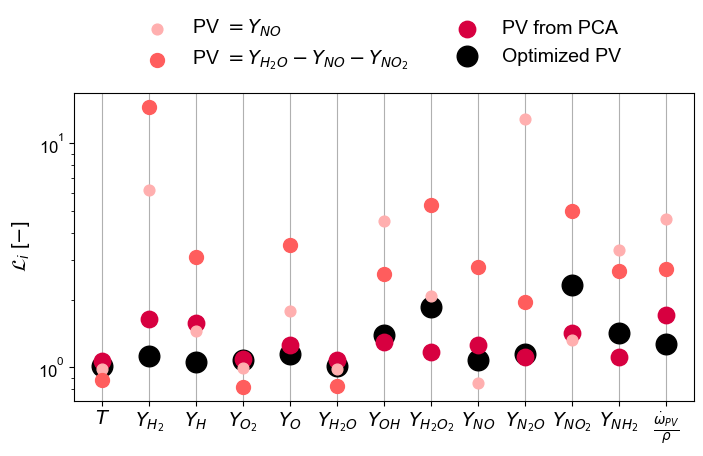

In [33]:
figure = plt.figure(figsize=(8, 4))
spec = figure.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])

x_range = [i for i in range(0,len(names_neat))]
fontsize_axes = 12
fontsize = 14
s = 2

figure_a = figure.add_subplot(spec[0,0])
plt.scatter(x_range, costs_YNO, c='#ffafaf', s=60, zorder=30, label='PV $= Y_{NO}$')
plt.scatter(x_range, costs_YNO_YNO2_YH2O, c='#ff5d5d', s=100, zorder=40, label='PV $ = Y_{H_2O} - Y_{NO} - Y_{NO_2}$')
plt.scatter(x_range, costs_PCA, c='#d70040', s=140, zorder=20, label='PV from PCA')
plt.scatter(x_range, costs_optimized, c='k', s=220, zorder=10, label='Optimized PV')
figure_a.xaxis.grid(True, alpha=1, zorder=1)
figure_a.tick_params(which='minor', labelsize=fontsize_axes)
figure_a.tick_params(which='major', labelsize=fontsize_axes)
plt.xticks(x_range, names_neat, fontsize=fontsize)
plt.ylabel('$\mathcal{L}_i$ [$-$]', fontsize=fontsize)
plt.yscale('log')
plt.legend(frameon=False, fontsize=fontsize, ncol=2, bbox_to_anchor=(0.91,1.3))
plt.savefig('../paper/tps-costs-collected.pdf', dpi=500, bbox_inches='tight')

***

© K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2025)